In [4]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
from google.colab import drive
import pandas as pd
#Se agregarán más en cuanto avance el temario de clase

In [9]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/EstadisticaProyecto/HeartD/data_cardiovascular_risk.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

# Selección de la Muestra --> Método Aleatorio


In [ ]:
#limites del dataset son [0,3390]

tam_muestra = 1200
HD = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 1200 registros


In [ ]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 134 to 553
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1200 non-null   int64  
 1   age              1200 non-null   int64  
 2   education        1170 non-null   float64
 3   sex              1200 non-null   object 
 4   is_smoking       1200 non-null   object 
 5   cigsPerDay       1189 non-null   float64
 6   BPMeds           1185 non-null   float64
 7   prevalentStroke  1200 non-null   int64  
 8   prevalentHyp     1200 non-null   int64  
 9   diabetes         1200 non-null   int64  
 10  totChol          1191 non-null   float64
 11  sysBP            1200 non-null   float64
 12  diaBP            1200 non-null   float64
 13  BMI              1196 non-null   float64
 14  heartRate        1200 non-null   float64
 15  glucose          1098 non-null   float64
 16  TenYearCHD       1200 non-null   int64  
dtypes: float64(9)

In [ ]:
HD.nunique()

id                 1200
age                  37
education             4
sex                   2
is_smoking            2
cigsPerDay           27
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             200
sysBP               189
diaBP               124
BMI                 745
heartRate            62
glucose              91
TenYearCHD            2
dtype: int64

In [ ]:
factor = list(HD.loc[:,HD.nunique() < 10]);
HD[factor] = HD[factor].astype('category')
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 134 to 553
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1200 non-null   int64   
 1   age              1200 non-null   int64   
 2   education        1170 non-null   category
 3   sex              1200 non-null   category
 4   is_smoking       1200 non-null   category
 5   cigsPerDay       1189 non-null   float64 
 6   BPMeds           1185 non-null   category
 7   prevalentStroke  1200 non-null   category
 8   prevalentHyp     1200 non-null   category
 9   diabetes         1200 non-null   category
 10  totChol          1191 non-null   float64 
 11  sysBP            1200 non-null   float64 
 12  diaBP            1200 non-null   float64 
 13  BMI              1196 non-null   float64 
 14  heartRate        1200 non-null   float64 
 15  glucose          1098 non-null   float64 
 16  TenYearCHD       1200 non-null   category

In [ ]:
HD.describe()

id          age   cigsPerDay      totChol        sysBP  \
count  1200.000000  1200.000000  1189.000000  1191.000000  1200.000000   
mean   1669.615833    49.443333     8.962994   236.708648   131.950417   
std     996.399212     8.537126    11.604683    45.688752    23.120244   
min       0.000000    33.000000     0.000000   129.000000    83.500000   
25%     797.000000    42.000000     0.000000   205.000000   116.000000   
50%    1643.000000    49.000000     0.000000   234.000000   127.500000   
75%    2570.750000    56.000000    20.000000   263.000000   143.000000   
max    3388.000000    69.000000    70.000000   600.000000   295.000000   

             diaBP          BMI    heartRate      glucose  
count  1200.000000  1196.000000  1200.000000  1098.000000  
mean     82.652083    25.737659    76.115833    81.860656  
std      12.382946     4.286638    12.177958    23.434769  
min      48.000000    15.960000    48.000000    40.000000  
25%      74.375000    22.770000    68.000000    71.000000  
50%      81.000000    25.180000    75.000000    78.000000  
75%      89.000000    28.095000    83.000000    87.000000  
max     142.500000    56.800000   125.000000   394.000000

In [ ]:
HD.describe(exclude= np.number)

education   sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
count      1170.0  1200       1200  1185.0             1200          1200   
unique        4.0     2          2     2.0                2             2   
top           1.0     F        YES     0.0                0             0   
freq        490.0   714        605  1153.0             1194           849   

        diabetes  TenYearCHD  
count       1200        1200  
unique         2           2  
top            0           0  
freq        1172        1028

# Diagramas de Frecuencia

In [ ]:

def grafico_frecuencias(variable):
    frecuencias = variable.value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias.index, frecuencias.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.title('Gráfico de Frecuencias')
    plt.xticks(rotation=45, ha='right')  # Agregar rotación y alineación para las etiquetas
    plt.show()

def grafico_frecuencias_relativas(variable):
    frecuencias_relativas = variable.value_counts(normalize=True)
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias_relativas.index, frecuencias_relativas.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia Relativa')
    plt.title('Gráfico de Frecuencias Relativas')
    plt.xticks(rotation=45, ha='right')  # Agregar rotación y alineación para las etiquetas
    plt.show()


Gráfico de frecuencias Absolutas con respecto a la educación


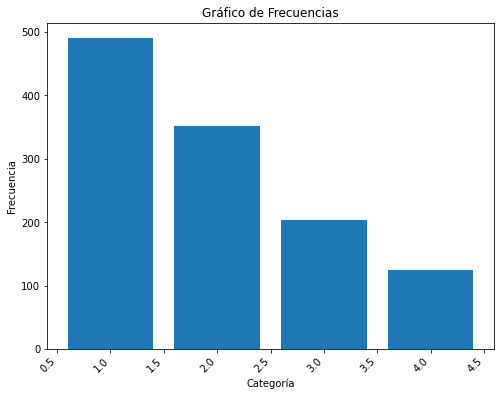

In [ ]:
print('Gráfico de frecuencias Absolutas con respecto a la educación')
grafico_frecuencias(HD['education'])

Gráfico de frecuencias Relativas con respecto a la educación


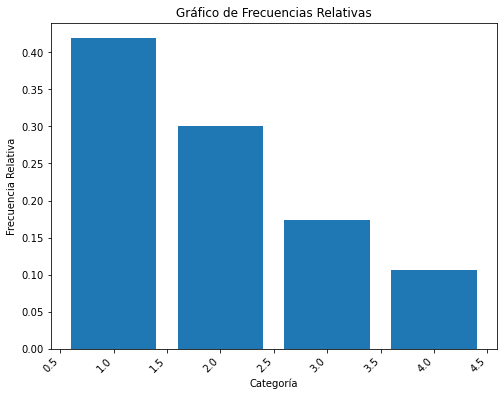

In [ ]:
print('Gráfico de frecuencias Relativas con respecto a la educación')
grafico_frecuencias_relativas(HD['education'])

In [ ]:
print('Gráfico de frecuencias Absolutas con respecto fumador o no')
grafico_frecuencias(HD['is_smoking'])

Gráfico de frecuencias Absolutas con respecto fumador o no


In [ ]:
print('Gráfico de frecuencias Relativas con respecto a la educación')
grafico_frecuencias_relativas(HD['is_smoking'])

Gráfico de frecuencias Relativas con respecto a la educación


Gráfico de frecuencias Absolutas con respecto tener diabetes o no


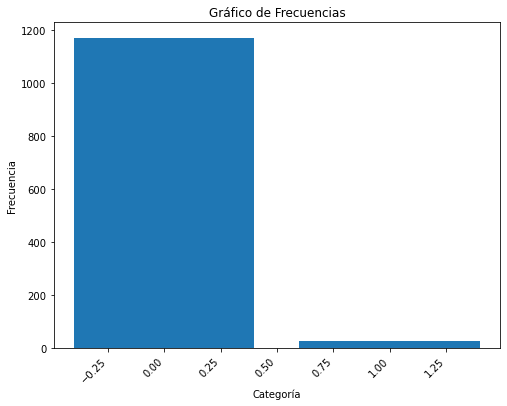

In [ ]:

print('Gráfico de frecuencias Absolutas con respecto tener diabetes o no')
grafico_frecuencias(HD['diabetes'])

In [ ]:
print('Gráfico de frecuencias Relativas con respecto al diabetes')
grafico_frecuencias_relativas(HD['diabetes'])

Gráfico de frecuencias Relativas con respecto al diabetes


In [ ]:
print('Gráfico de frecuencias Absolutas con respecto tener un accidente cerebrovascular previo')
grafico_frecuencias(HD['prevalentStroke'])

Gráfico de frecuencias Absolutas con respecto tener un accidente cerebrovascular previo


In [ ]:
print('Gráfico de frecuencias Relativas con respecto a tener un accidente cerebrovascular previo')
grafico_frecuencias_relativas(HD['prevalentStroke'])

Gráfico de frecuencias Relativas con respecto a tener un accidente cerebrovascular previo


Gráfico de frecuencias Absolutas con respecto tener un accidente cerebrovascular previo


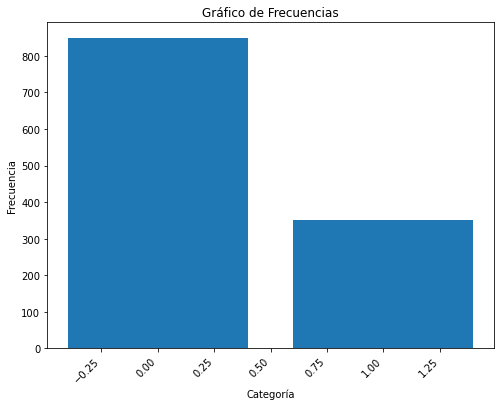

In [ ]:
print('Gráfico de frecuencias Absolutas con respecto tener un accidente cerebrovascular previo')
grafico_frecuencias(HD['prevalentHyp'])

Gráfico de frecuencias Relativas con respecto atener un accidente cerebrovascular previo


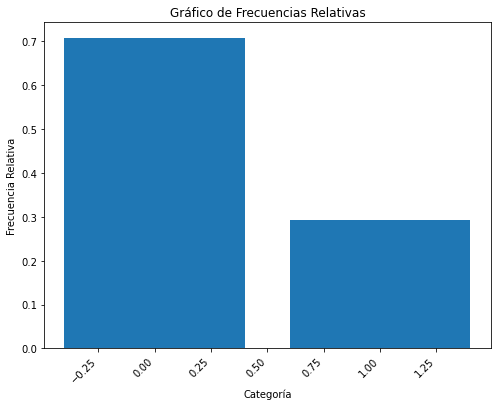

In [ ]:
print('Gráfico de frecuencias Relativas con respecto atener un accidente cerebrovascular previo')
grafico_frecuencias_relativas(HD['prevalentHyp'])

In [ ]:
Inicio Del Análisis Regresivo


SyntaxError: invalid syntax (2960926122.py, line 1)

In [ ]:
#funcion de Cramer
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer


Esta Funcion nos permite establecer un ranking de importancia usando el coeficiente de Cramer, para ver cuales son las variables que más van a influir en la variable dependiente.